In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()

In [3]:
# load the data
raw_data = pd.read_csv('data/Admittance.csv')
raw_data[:3]

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes


In [9]:
# split the data 
x1 = raw_data['SAT']
y = raw_data['Admitted']

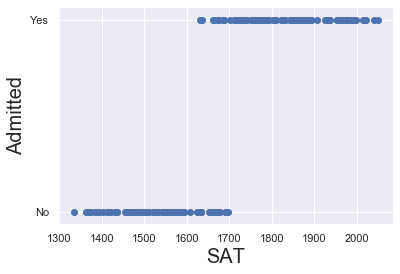

In [10]:
#scatter plot
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

In [17]:
#### Plot with a regression line
# here error is due to the categorical varibale Admitted
x = sm.add_constant(x1)
reg_line = sm.OLS(y,x).fit()

plt.scatter(x1,y,color='C0')

y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')

plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [18]:
#changing to dummies
data_dummies = raw_data.copy()
data_dummies['Admitted'] = data_dummies['Admitted'].map({'Yes':1,'No':0})
data_dummies[:3]

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1


In [20]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
SAT         168 non-null int64
Admitted    168 non-null int64
dtypes: int64(2)
memory usage: 2.8 KB


In [23]:
x1 = data_dummies['SAT']
y = data_dummies['Admitted']

In [24]:
x = sm.add_constant(x1)
reg_line = sm.OLS(y,x).fit()
reg_line.summary()

C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           2.98e-43
Time:                        18:34:54   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

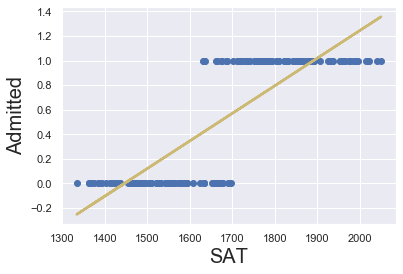

In [25]:
plt.scatter(x1,y,color='C0')
y_hat = x1*reg_line.params[1]+reg_line.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

##### PLot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


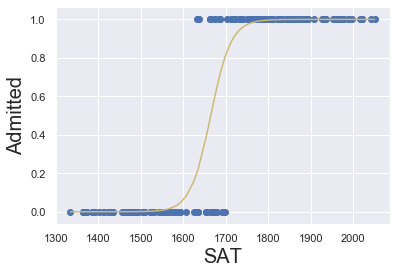

In [30]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [31]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.7992
Time:                        19:10:56   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

***Logistic Regression Summary***
1. (`MLE => Maximum likelihood estimation`) likelihood function: a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables.
* The `bigger the likelihood` function, the higher probability that our model is correct!

> MLE tries to maximize the likelihood function.

2. `Log-Likelihood` bigger it is the better
3. `ll-null`(log likelihood-null)
4. `LLR` (log likelihood ratio) : measures if our model is statistically different from LL-null, aka. a useless model
5. Pseudo R-squared -> (McFadden's R-squared) 
    * A good Pseudo R-squared is somewhere between 0.2 and 0.4
    * This measures is mostly useful for comparing variations of the same model
    * Different models will have completely different and incomparable Pseudo R-squared!

$log \frac{p}{1-p} = -69.91 + 0.042*SAT$

$$e^(log\frac {odds2}{odds2}) = e^b K $$
> * When the SAT score increases by 1, the odds of admittance increase by 4.2%
> * When the SAT score increases by 10, the odds of admittance increase by 152%
> * When the SAT score increases by 100, the odds of admittance increase by 6669%

##### Logistic Regression another Example

In [35]:
raw_data = pd.read_csv('data/Binary_predictors.csv')
raw_data[:2]

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female


In [36]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Female':1,'Male':0})
data[:2]

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1


In [37]:
# Create the dependent and independent variables
x1 = data[['SAT','Gender']]
y = data['Admitted']

In [38]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x).fit()
reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.8249
Time:                        19:53:19   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
np.exp(1.944)

6.986641718828549

\begin{equation*}
odds_f = 6.99 * odds_m    
\end{equation*}
* Given the same SAT score, Odds of female to get admitted are 7.99 times higher than those of a male.
> f = female & m = male


##### Accuracy of the model

In [45]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
reg_log.predict()[:50]

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01])

In [46]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [47]:
reg_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

##### Confusion Matrix

In [48]:
cm_df = pd.DataFrame(reg_log.pred_table())
cm_df.columns =['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [50]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

##### Testing the model and assessing its accuracy

In [51]:
x[:3]

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1


In [53]:
test_actual = data['Admitted']
test_data = data.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data[:3]

C:\Users\SarboPc\Anaconda3\envs\dataScience\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1


#### custom confusion matrix with accuracy

In [56]:
def confusion_matrix(data,actual_values,model):
    
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [62]:
cm = confusion_matrix(test_data,test_actual,reg_log)
cm

(array([[69.00, 5.00],
        [4.00, 90.00]]), 0.9464285714285714)

In [63]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns =['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [ ]:
print('Missclassification rate:' +str((4+5)/1))